In [4]:
import cv2
import matplotlib.pyplot as plt

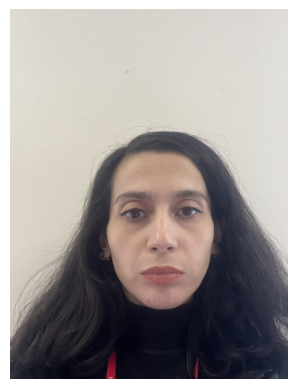

In [5]:
#Second step:read the image by "imread" the path and the file name should be given to the imread
img = cv2.imread("C:/Users/Kyle/Desktop/Middlesex uni/ng_edge detection.jpg")

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

Canny

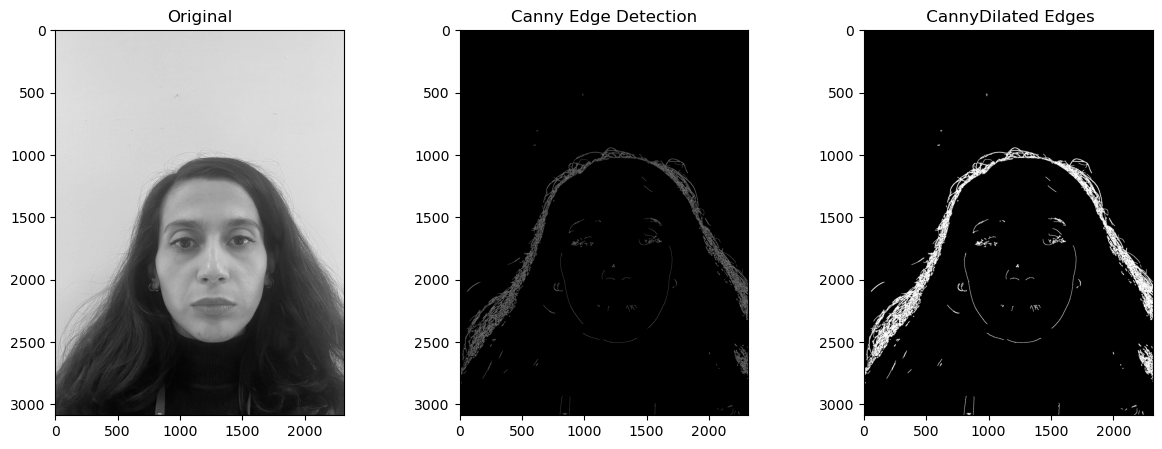

In [11]:
import cv2
import matplotlib.pyplot as plt

# Read image in grayscale format
img = cv2.imread("C:/Users/Kyle/Desktop/Middlesex uni/ng_edge detection.jpg", cv2.IMREAD_GRAYSCALE)

# Apply Gaussian blur to reduce noise and improve edge detection
blurred_img = cv2.GaussianBlur(img, (5, 5), 0)

# Apply Canny edge detection with fine-tuned threshold values
edges = cv2.Canny(blurred_img, 50, 150)  # Adjusted min and max thresholds for better edge detection

# Apply dilation to enhance edges
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
dilated_edges = cv2.dilate(edges, kernel, iterations=1)

# Display original, blurred, Canny edge detection, and dilated edge images
plt.figure(figsize=(20, 5))

plt.subplot(1, 4, 1)
plt.imshow(img, cmap='gray')
plt.title('Original')

plt.subplot(1, 4, 2)
plt.imshow(edges, cmap='gray')
plt.title('Canny Edge Detection')

plt.subplot(1, 4, 3)
plt.imshow(dilated_edges, cmap='gray')
plt.title(' CannyDilated Edges')

plt.show()


In [ ]:
Canny

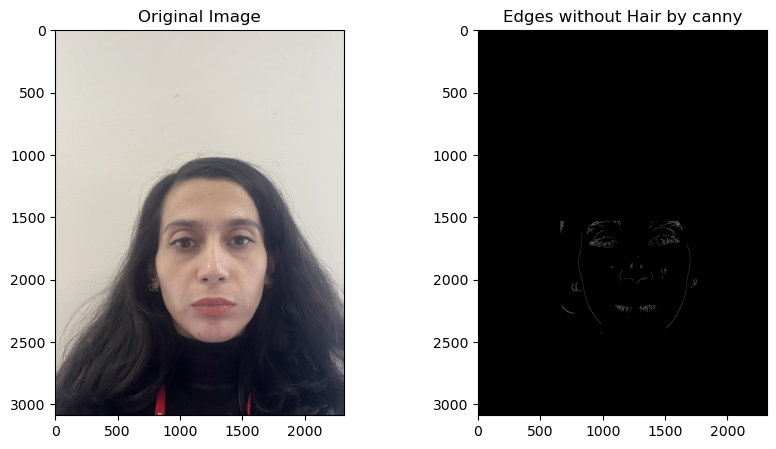

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = 'C:/Users/Kyle/Desktop/Middlesex uni/ng_edge detection.jpg'
image = cv2.imread(image_path)

# Check if the image was loaded correctly
if image is None:
    print("Error: Could not load image.")
else:
    # Convert to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply Gaussian Blur
    blurred = cv2.GaussianBlur(gray, (5, 5), 1.4)

    # Load a pre-trained face detector
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

    # Detect faces in the image
    faces = face_cascade.detectMultiScale(blurred, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

    # Create a mask to exclude hair
    mask = np.zeros_like(gray)

    for (x, y, w, h) in faces:
        # Define the face region (exclude top part for hair)
        face_region_top = y + int(h / 4)
        face_region_bottom = y + h
        face_region_left = x
        face_region_right = x + w

        # Draw a filled white rectangle on the mask for the face region
        mask[face_region_top:face_region_bottom, face_region_left:face_region_right] = 255

    # Apply Canny edge detection on the masked face region
    edges = cv2.Canny(blurred, 30, 90)  # Experiment with these thresholds
    edges = cv2.bitwise_and(edges, edges, mask=mask)

    # Display the results
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.title('Original Image')
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

    plt.subplot(1, 2, 2)
    plt.title('Edges without Hair by canny')
    plt.imshow(edges, cmap='gray')

    plt.show()


Sobel

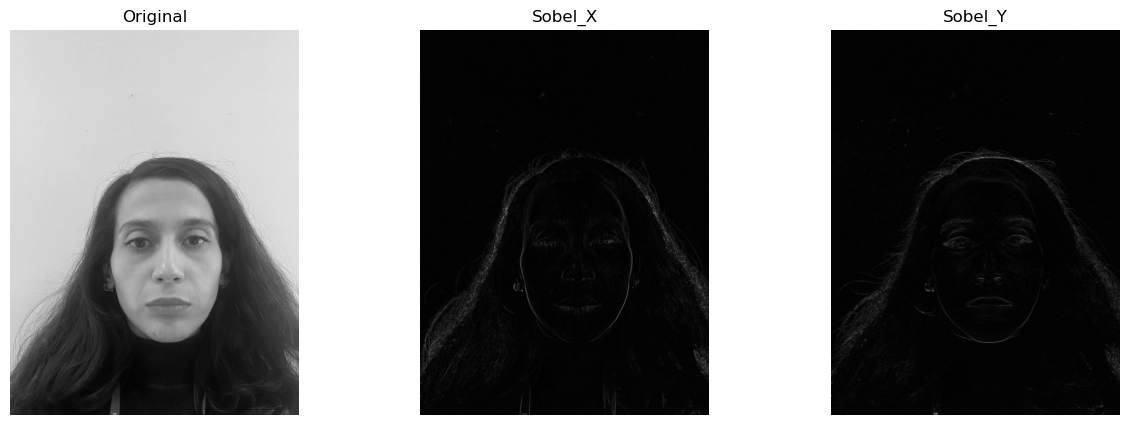

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read image in grayscale format
gray = cv2.imread("C:/Users/Kyle/Desktop/Middlesex uni/ng_edge detection.jpg", cv2.IMREAD_GRAYSCALE)

# Apply Gaussian blur to reduce noise and improve edge detection
blurred = cv2.GaussianBlur(gray, (7, 7), 0)

# Apply Sobel filters
sobel_x = cv2.Sobel(blurred, cv2.CV_64F, 1, 0, ksize=5)
sobel_y = cv2.Sobel(blurred, cv2.CV_64F, 0, 1, ksize=5)

# Absolute values of Sobel X and Sobel Y
abs_sobel_x = np.abs(sobel_x)
abs_sobel_y = np.abs(sobel_y)

# Combine Sobel X and Sobel Y images to emphasize edges
sobel_edges = cv2.addWeighted(abs_sobel_x, 0.5, abs_sobel_y, 0.5, 0)

# Threshold the combined edges
threshold = 50
sobel_edges[sobel_edges < threshold] = 0
sobel_edges[sobel_edges >= threshold] = 255

# Prepare plots
f, axes = plt.subplots(1, 3, figsize=(15, 5))

# Original, Sobel_X, and Sobel_Y images
images = [gray, abs_sobel_x, abs_sobel_y]
titles = ["Original", "Sobel_X", "Sobel_Y"]

for ax, img, title in zip(axes, images, titles):
    ax.imshow(img, cmap='gray')
    ax.set_title(title)
    ax.axis('off')

plt.show()


Laplacian

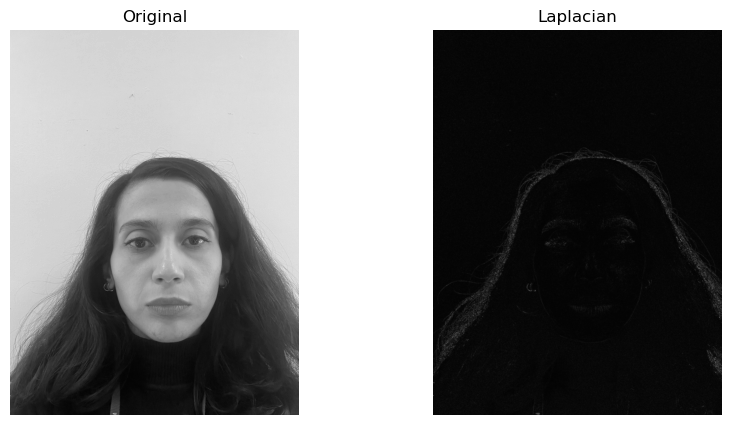

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read image in grayscale format
gray = cv2.imread("C:/Users/Kyle/Desktop/Middlesex uni/ng_edge detection.jpg", cv2.IMREAD_GRAYSCALE)

# Apply Gaussian blur to reduce noise and improve edge detection
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# Apply Laplacian filter
laplacian = cv2.Laplacian(blurred, cv2.CV_64F)

# Absolute values of Laplacian to obtain the edges
abs_laplacian = np.abs(laplacian)
max_value = np.max(abs_laplacian)
scaled_laplacian = np.uint8((abs_laplacian / max_value) * 255)

# Threshold the edges
threshold = 50
binary_edge = np.uint8(scaled_laplacian > threshold) * 255

# Prepare plots
f, axes = plt.subplots(1, 2, figsize=(10, 5))

# Original and Laplacian images
images = [gray, scaled_laplacian]
titles = ["Original", "Laplacian"]

for ax, img, title in zip(axes, images, titles):
    ax.imshow(img, cmap='gray')
    ax.set_title(title)
    ax.axis('off')

plt.show()


HSV

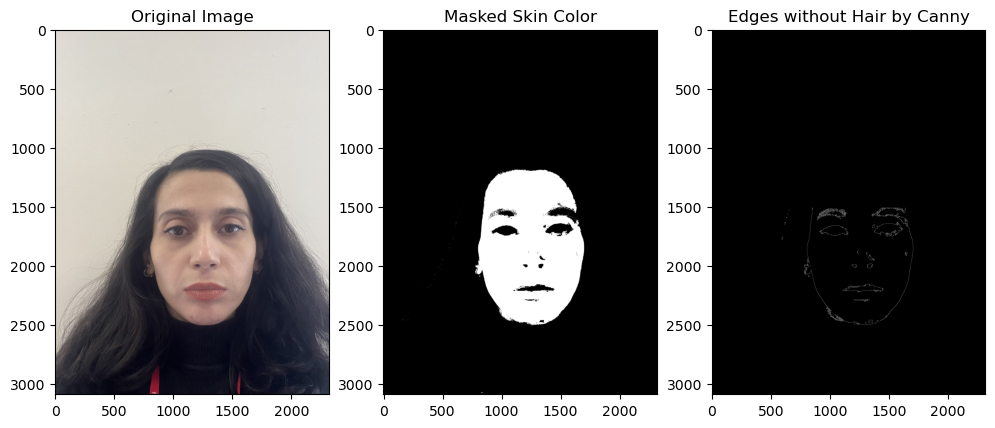

In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = 'C:/Users/Kyle/Desktop/Middlesex uni/ng_edge detection.jpg'
image = cv2.imread(image_path)

# Check if the image was loaded correctly
if image is None:
    print("Error: Could not load image.")
else:
    # Convert to HSV color space
    hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    # Define lower and upper bounds for skin color in HSV
    lower_skin = np.array([0, 48, 80], dtype=np.uint8)
    upper_skin = np.array([20, 255, 255], dtype=np.uint8)

    # Create a mask to isolate skin color
    mask = cv2.inRange(hsv_image, lower_skin, upper_skin)

    # Apply Gaussian Blur to the mask
    blurred_mask = cv2.GaussianBlur(mask, (5, 5), 1.4)

    # Load a pre-trained face detector
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

    # Detect faces in the image
    faces = face_cascade.detectMultiScale(blurred_mask, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

    # Create a mask to exclude hair
    mask_no_hair = np.zeros_like(mask)

    for (x, y, w, h) in faces:
        # Define the face region (exclude top part for hair)
        face_region_top = y + int(h / 4)
        face_region_bottom = y + h
        face_region_left = x
        face_region_right = x + w

        # Draw a filled white rectangle on the mask for the face region
        mask_no_hair[face_region_top:face_region_bottom, face_region_left:face_region_right] = 255

    # Apply Canny edge detection on the masked face region
    edges = cv2.Canny(blurred_mask, 30, 90)  # Experiment with these thresholds
    edges_no_hair = cv2.bitwise_and(edges, edges, mask=mask_no_hair)

    # Display the results
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 3, 1)
    plt.title('Original Image')
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

    plt.subplot(1, 3, 2)
    plt.title('Masked Skin Color')
    plt.imshow(mask, cmap='gray')

    plt.subplot(1, 3, 3)
    plt.title('Edges without Hair by Canny')
    plt.imshow(edges_no_hair, cmap='gray')

    plt.show()


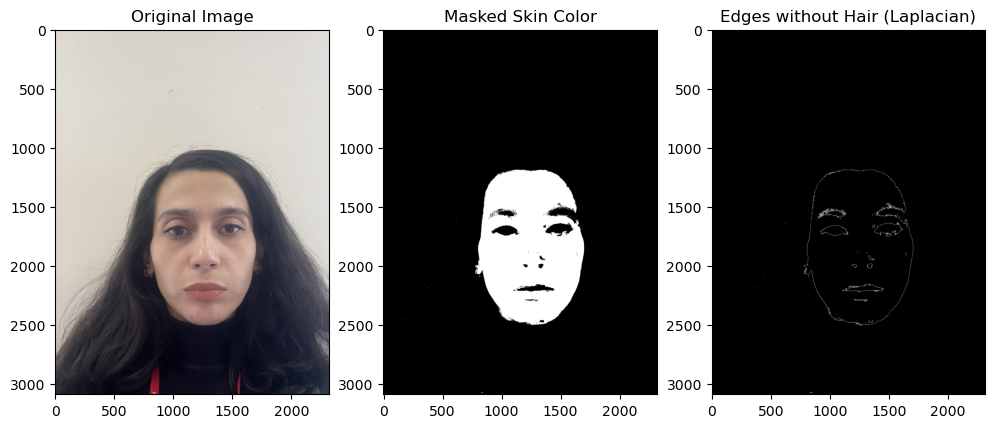

In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = 'C:/Users/Kyle/Desktop/Middlesex uni/ng_edge detection.jpg'
image = cv2.imread(image_path)

# Check if the image was loaded correctly
if image is None:
    print("Error: Could not load image.")
else:
    # Convert to HSV color space
    hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    # Define lower and upper bounds for skin color in HSV
    lower_skin = np.array([0, 48, 80], dtype=np.uint8)
    upper_skin = np.array([20, 255, 255], dtype=np.uint8)

    # Create a mask to isolate skin color
    mask = cv2.inRange(hsv_image, lower_skin, upper_skin)

    # Apply Gaussian Blur to the mask
    blurred_mask = cv2.GaussianBlur(mask, (5, 5), 1.4)

    # Load a pre-trained face detector
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

    # Detect faces in the image
    faces = face_cascade.detectMultiScale(blurred_mask, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

    # Create a mask to exclude hair
    mask_no_hair = np.zeros_like(mask)

    for (x, y, w, h) in faces:
        # Define the face region (exclude top part for hair)
        face_region_top = y + int(h / 4)
        face_region_bottom = y + h
        face_region_left = x
        face_region_right = x + w

        # Draw a filled white rectangle on the mask for the face region
        mask_no_hair[face_region_top:face_region_bottom, face_region_left:face_region_right] = 255

    # Apply Laplacian edge detection on the masked face region
    laplacian = cv2.Laplacian(blurred_mask, cv2.CV_64F)

    # Threshold the Laplacian result to obtain binary edges
    _, edges_no_hair = cv2.threshold(np.uint8(np.absolute(laplacian)), 30, 255, cv2.THRESH_BINARY)

    # Display the results
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 3, 1)
    plt.title('Original Image')
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

    plt.subplot(1, 3, 2)
    plt.title('Masked Skin Color')
    plt.imshow(mask, cmap='gray')

    plt.subplot(1, 3, 3)
    plt.title('Edges without Hair (Laplacian)')
    plt.imshow(edges_no_hair, cmap='gray')

    plt.show()


HSV

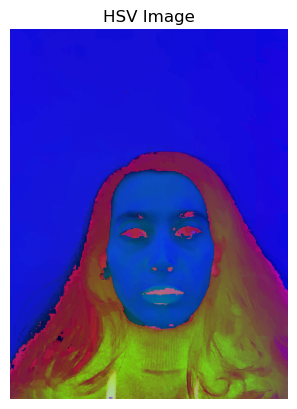

In [15]:
import cv2
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('C:/Users/Kyle/Desktop/Middlesex uni/ng_edge detection.jpg')

# Convert the image to HSV color space
hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Display the HSV image
plt.title('HSV Image')  # Title for the plot
plt.axis('off')  # Turn off axes
plt.imshow(hsv_image)  # Display the HSV image
plt.show()  # Show the plot


Robert

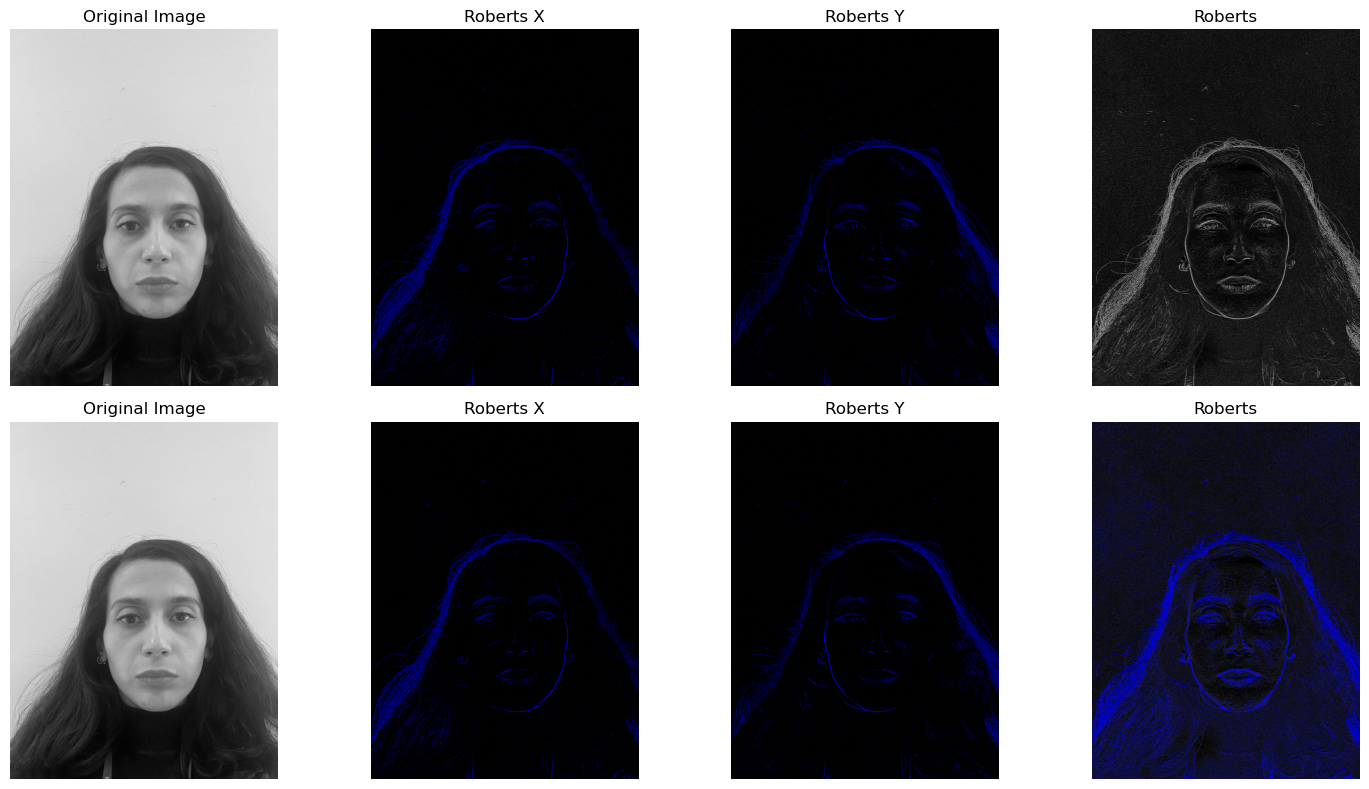

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Function to colorize image considering intensity threshold
def colorize_considering_intensity(image, thre):
    colored_image = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
    colored_image[np.where(image > thre)] = [0, 0, 255]  # Red for high intensity
    return colored_image

# Read image in grayscale format
img = cv2.imread("C:/Users/Kyle/Desktop/Middlesex uni/ng_edge detection.jpg", cv2.IMREAD_GRAYSCALE)

# Apply Gaussian blur to reduce noise and improve edge detection
blurred = cv2.GaussianBlur(img, (5, 5), 0)

# Roberts Cross edge detection
roberts_x = cv2.filter2D(blurred, -1, np.array([[1, 0], [0, -1]]))
roberts_y = cv2.filter2D(blurred, -1, np.array([[0, 1], [-1, 0]]))

# Compute gradient magnitude
gradient_magnitude = np.sqrt(roberts_x**2 + roberts_y**2)

# Normalize the gradient magnitude
normalized_image = (gradient_magnitude - np.min(gradient_magnitude)) / (np.max(gradient_magnitude) - np.min(gradient_magnitude))
normalized_image = (normalized_image * 255).astype(np.uint8)

# Create a mask based on normalized image
mask = cv2.threshold(normalized_image, 50, 255, cv2.THRESH_BINARY)[1]

# Colorize image based on the mask
blue_image = cv2.cvtColor(normalized_image, cv2.COLOR_GRAY2BGR)
blue_image[np.where(mask == 255)] = [0, 0, 255]

# Colorize Roberts X and Y images
roberts_x_colorized = colorize_considering_intensity(roberts_x, thre=5)
roberts_y_colorized = colorize_considering_intensity(roberts_y, thre=5)

# Display the images
fig, axes = plt.subplots(2, 4, figsize=(15, 8))

axes[0, 0].imshow(img, cmap='gray')
axes[0, 0].set_title("Original Image")
axes[0, 0].axis('off')

axes[0, 1].imshow(roberts_x_colorized, cmap='gray')
axes[0, 1].set_title("Roberts X")
axes[0, 1].axis('off')

axes[0, 2].imshow(roberts_y_colorized, cmap='gray')
axes[0, 2].set_title("Roberts Y")
axes[0, 2].axis('off')

axes[0, 3].imshow(gradient_magnitude, cmap='gray')
axes[0, 3].set_title("Roberts")
axes[0, 3].axis('off')

axes[1, 0].imshow(img, cmap='gray')
axes[1, 0].set_title("Original Image")
axes[1, 0].axis('off')

axes[1, 1].imshow(roberts_x_colorized, cmap='gray')
axes[1, 1].set_title("Roberts X")
axes[1, 1].axis('off')

axes[1, 2].imshow(roberts_y_colorized, cmap='gray')
axes[1, 2].set_title("Roberts Y")
axes[1, 2].axis('off')

axes[1, 3].imshow(blue_image, cmap='gray')
axes[1, 3].set_title("Roberts")
axes[1, 3].axis('off')

plt.tight_layout()
plt.show()


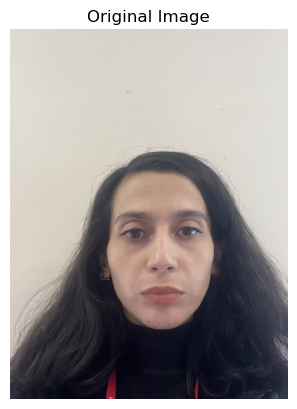

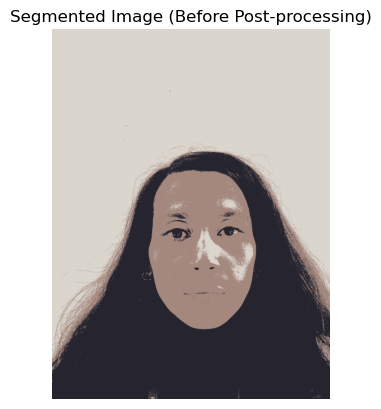

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import cv2

# Read the image
img = cv2.imread('C:/Users/Kyle/Desktop/Middlesex uni/ng_edge detection.jpg')

# Check if the image is loaded properly
if img is None:
    print("Error: Failed to load the image.")
else:
    # Display the original image
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title("Original Image")
    plt.axis('off')
    plt.show()

    # Define the number of clusters
    k = 3  # Adjust as needed

    # Initialize KMeans with explicit n_init
    kmeans = KMeans(n_clusters=k, n_init=10)

    # Convert the image to float32
    pixels = np.float32(img.reshape((-1, 3)))

    # Perform KMeans clustering
    kmeans.fit(pixels)

    # Get labels and centroids
    labels = kmeans.labels_
    centroids = kmeans.cluster_centers_

    # Create segmented image
    segmented_image = centroids[labels].reshape(img.shape).astype(np.uint8)

    # Display the segmented image before post-processing
    plt.imshow(cv2.cvtColor(segmented_image, cv2.COLOR_BGR2RGB))
    plt.title("Segmented Image (Before Post-processing)")
    plt.axis('off')
    plt.show()

    # Post-processing: Remove small artifacts (e.g., hairs)
    # You can adjust the threshold size as needed
    segmented_gray = cv2.cvtColor(segmented_image, cv2.COLOR_BGR2GRAY)
    _, binary_image = cv2.threshold(segmented_gray, 0, 255, cv2.THRESH_BINARY)
    binary_image = cv2.medianBlur(binary_image, 5)  # Apply median blur to remove noise
    contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    for contour in contours:
        area = cv2.contourArea(contour)
        if area < 100:  # Adjust the threshold as needed
            cv2.drawContours(binary_image, [contour], 0, (0, 0, 0), -1)

   #


SVM

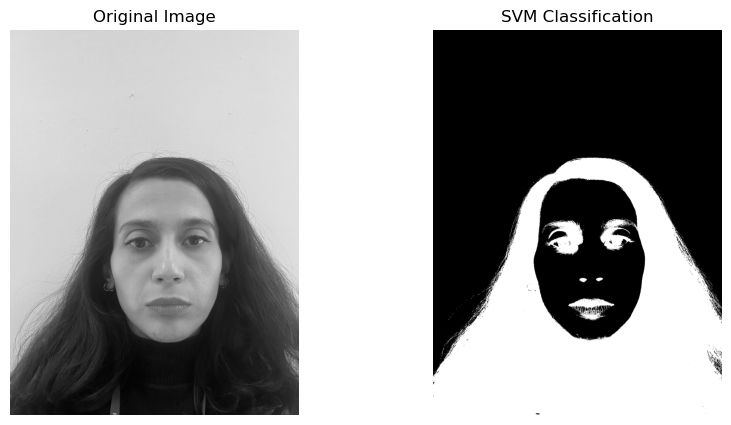

In [5]:
import cv2
import numpy as np
from sklearn.svm import SVC
import matplotlib.pyplot as plt

# Load the image in grayscale
img = cv2.imread('C:/Users/Kyle/Desktop/Middlesex uni/ng_edge detection.jpg', cv2.IMREAD_GRAYSCALE)

# Check if the image is loaded properly
if img is None:
    print("Error: Failed to load the image.")
    exit()

# Flatten the image to a 1D array for features
X = img.reshape(-1, 1)

# Create labels for the features
# Let's assume we manually label some pixels as object (1) and background (0)
# For simplicity, let's use some random pixels as samples for SVM
np.random.seed(42)  # For reproducibility
num_samples = 1000  # Number of sample points

# Generate random indices for samples
indices = np.random.choice(X.shape[0], num_samples, replace=False)

# Create a binary label array with an equal number of object and background samples
y = np.zeros(num_samples)
y[:num_samples // 2] = 1  # Half of the samples are labeled as object

# Extract features and corresponding labels
X_samples = X[indices]
y_samples = y

# Initialize SVM classifier
svm_classifier = SVC(kernel='linear')

# Train the classifier
svm_classifier.fit(X_samples, y_samples)

# Make predictions for the entire image
prediction = svm_classifier.predict(X)

# Reshape the prediction to match the original image dimensions
prediction_image = prediction.reshape(img.shape)

# Visualize the results
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(prediction_image, cmap='gray')
plt.title('SVM Classification')
plt.axis('off')

plt.show()


Kmeans with Prewitt

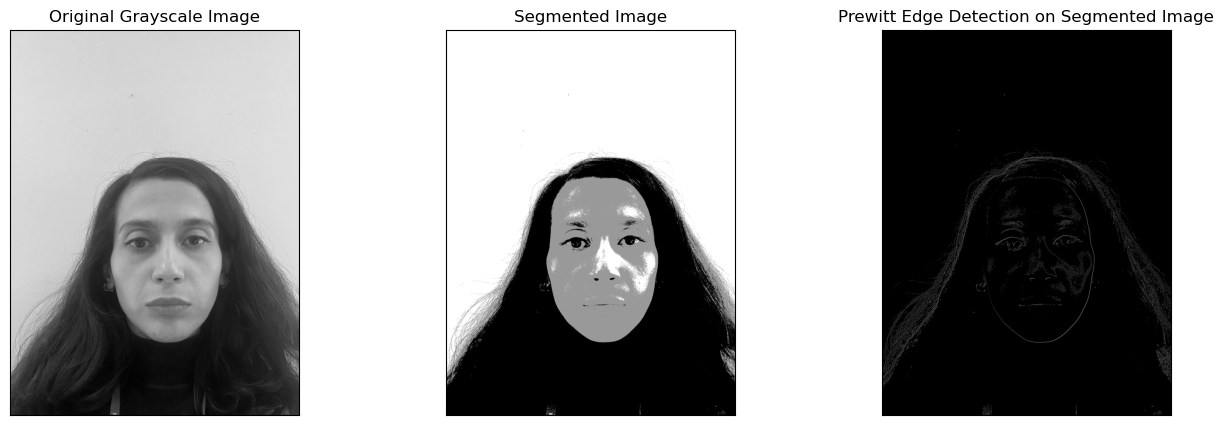

In [6]:
from matplotlib import pyplot as plt
import cv2
import numpy as np

# Read the image in grayscale mode
img = cv2.imread('C:/Users/Kyle/Desktop/Middlesex uni/ng_edge detection.jpg')
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Reshape the image to a 2D array of pixels
pixel_values = img.reshape((-1, 3))
pixel_values = np.float32(pixel_values)

# Define criteria, number of clusters (K) and apply K-means
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
K = 3
_, labels, centers = cv2.kmeans(pixel_values, K, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

# Convert back to 8 bit values
centers = np.uint8(centers)
labels = labels.flatten()

# Convert all pixels to the color of the centroids
segmented_image = centers[labels.flatten()]

# Reshape back to the original image dimensions
segmented_image = segmented_image.reshape(img.shape)

# Convert the segmented image to grayscale
segmented_image_gray = cv2.cvtColor(segmented_image, cv2.COLOR_BGR2GRAY)

# Apply Gaussian blur to the segmented grayscale image to reduce noise
blurred = cv2.GaussianBlur(segmented_image_gray, (5, 5), 0)

# Prewitt kernels
prewitt_kernel_x = np.array([[1, 0, -1], [1, 0, -1], [1, 0, -1]])
prewitt_kernel_y = np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]])

# Apply Prewitt operator in the x direction
prewitt_x = cv2.filter2D(blurred, -1, prewitt_kernel_x)

# Apply Prewitt operator in the y direction
prewitt_y = cv2.filter2D(blurred, -1, prewitt_kernel_y)

# Combine the Prewitt x and y edges
edges_prewitt = cv2.addWeighted(prewitt_x, 0.5, prewitt_y, 0.5, 0)

# Titles and images for displaying
titles = ['Original Grayscale Image', 'Segmented Image', 'Prewitt Edge Detection on Segmented Image']
images = [img_gray, segmented_image_gray, edges_prewitt]

# Plot the images
plt.figure(figsize=(15, 5))
for i in range(3):
    plt.subplot(1, 3, i + 1)  # Create a subplot with 1 row and 3 columns
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])

plt.subplots_adjust(wspace=0.5)  # Adjust horizontal spacing between subplots
plt.show()
